
¡Hola, Sergio!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>


<div class="alert alert-block alert-info">
<b>Hola Tonatiuh, gracias por la revisión y por tus comentarios, tendré en cuenta esos consejos para futuras ocasiones, y debo decir,que ya he completado lo que hacia falta en el proyecto.

Un saludo, y quedo atento a cualquier comentario.</b> <a class="tocSkip"></a>


# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [4]:
# Cargar todas las librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from scipy.stats import ttest_ind
import seaborn as sns
import math


<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Recomiendo cargar la libreria math. De esta manera, puedes realizar redondeos con otros métodos. 
</div>

<div class="alert alert-block alert-info">
<b>Librería importada</b> <a class="tocSkip"></a>



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

## Cargar datos

In [5]:
# Carga los archivos de datos en diferentes DataFrames

# Tabla CALLS
df_calls = pd.read_csv('/datasets/megaline_calls.csv')
# Tabla INTERNET
df_net = pd.read_csv('/datasets/megaline_internet.csv')
# Tabla MESSAGES
df_msg = pd.read_csv('/datasets/megaline_messages.csv')
# Tabla PlANS
df_plans = pd.read_csv('/datasets/megaline_plans.csv')
# Tabla USERS
df_users = pd.read_csv('/datasets/megaline_users.csv')

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [6]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas

print('TABLA CALLS')
df_calls.info()
print()
print(df_calls.head())
print()

print('TABLA INTERNET')
df_net.info() 
print()
print(df_net.head())
print()

print('TABLA MESSAGES')
df_msg.info() 
print()
print(df_msg.head())
print()

print('TABLA PLANS')
df_plans.info() 
print()
print(df_plans.head())
print()

print('TABLA USERS')
df_users.info() 
print()
print(df_users.head())

TABLA CALLS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22

TABLA INTERNET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   sess

In [7]:
# Imprime una muestra de los datos para las tarifas
print(df_plans)


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Despues de revisar todos los dataframes noté 2 cosas, primero, que en todos los dataframes salvo el de "plans" tienen columnas con fechas que python está interpretando como tipo de dato "object" las cuales valdría la pena convertir a datetime, con el objetivo de examinar los habitos de consumo de los usuarios a nivel mensual, semanal o inclusio diario. 
Por otro lado, en el df_users la columna churn_date contiene solo 34 valores no nulos, es decir, solo hay 34 datos registrados de usuarios que cancelaron su servicio con la empresa Megaline. estos valores ausentes NaN, no necesariamente son errores, pero igual esta columna se puede convertir a datetime, para estimar el tiempo que estuvieron suscritos antes de cancelar, que tipo de plan habian escogido y si hay relación entre el uso del servicio y la baja.

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [8]:
df_calls['call_date']= pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')

df_net['session_date']= pd.to_datetime(df_net['session_date'], format='%Y-%m-%d')

df_msg['message_date']= pd.to_datetime(df_msg['message_date'], format='%Y-%m-%d')

df_users['reg_date']= pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')
df_users['churn_date']=pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')

df_calls.info()
print()
df_net.info()
print()
df_msg.info()
print()
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB

<class 'pandas.core.fr

<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

En todos los casos en los que cambiamos el tipo de variable a datetime, te recomiendo agregar el argumento "format='%Y-%m-%d'" dentro de la función to_datetime(). De esta manera, puedes asegurarte siempre de que el formato de la fecha que deseas cambiar sea el que necesitas.
</div>

<div class="alert alert-block alert-info">
<b> Cambios realizados</b> <a class="tocSkip"></a>

He agregado el argumento format en la transfromación de los datos
</div>


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Usuarios/as

In [9]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [10]:
# Imprime una muestra de datos para usuarios

print(df_users.head(10))

   user_id first_name  last_name  age                                    city  \
0     1000   Anamaria      Bauer   45   Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28         Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36    Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                           Tulsa, OK MSA   
4     1004    Leonila   Thompson   40         Seattle-Tacoma-Bellevue, WA MSA   
5     1005      Livia    Shields   31     Dallas-Fort Worth-Arlington, TX MSA   
6     1006     Jesusa   Bradford   73  San Francisco-Oakland-Berkeley, CA MSA   
7     1007    Eusebio      Welch   42           Grand Rapids-Kentwood, MI MSA   
8     1008      Emely    Hoffman   53       Orlando-Kissimmee-Sanford, FL MSA   
9     1009      Gerry     Little   19  San Jose-Sunnyvale-Santa Clara, CA MSA   

    reg_date      plan churn_date  
0 2018-12-24  ultimate        NaT  
1 2018-08-13      surf        NaT  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Despues de revisar detenidamente los datos del dataframe Users se ve que los nombres, apellidos y nombres de las ciudades están usando una capitalización en la primera letra, lo cual no necesariamente representa un problema o un error, sin embargo en la columna ciudad  al final pone en Mayusculas el estado al cual pertenece cada usuario, y esta característica si podría ser util para analizar más a fondo los datos determinando cuantos ingresos o terminaciones de contrato hay presentes por estado, por lo cual valdría la pena separar los datos de esta columna, crear una columna adicional y que contenga exclusivamente los estados.

También es cierto que contiene valores ausentes NaN, pero como mencioné antes, estos valores, no necesariamente son errores, al contrario están brindando una información importante de que el usuario sigue activo hasta la fecha.
tal vez valdría la pena revisar si hay duplicados en la tabla y en caso de que sí eliminarlos.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [11]:
print('El total de valores duplicados es:',df_users['user_id'].duplicated().sum())
print('El total de valores ausentes es:',df_users.isna().sum())

#Creo 2 columnas una que se llamará "region/city" y otra que se llamará "state" a partir de la columna city
df_users['region/city']= df_users['city'].str.split(', ').str[0]
df_users['state']= df_users['city'].str.split(', ').str[1]
# Elimino la columna city inicial
df_users=df_users.drop('city', axis=1)
print(df_users.head())

El total de valores duplicados es: 0
El total de valores ausentes es: user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64
   user_id first_name  last_name  age   reg_date      plan churn_date  \
0     1000   Anamaria      Bauer   45 2018-12-24  ultimate        NaT   
1     1001     Mickey  Wilkerson   28 2018-08-13      surf        NaT   
2     1002     Carlee    Hoffman   36 2018-10-21      surf        NaT   
3     1003   Reynaldo    Jenkins   52 2018-01-28      surf        NaT   
4     1004    Leonila   Thompson   40 2018-05-23      surf        NaT   

                     region/city   state  
0  Atlanta-Sandy Springs-Roswell  GA MSA  
1        Seattle-Tacoma-Bellevue  WA MSA  
2   Las Vegas-Henderson-Paradise  NV MSA  
3                          Tulsa  OK MSA  
4        Seattle-Tacoma-Bellevue  WA MSA  


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [9]:
#Honestamente no se me ocurre nada más para agregarle a este dataframe

## Llamadas

In [12]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

df_calls.info()
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB



In [11]:
# Imprime una muestra de datos para las llamadas

print(df_calls.head())
print()
print('El total de valores duplicados es:',df_calls['id'].duplicated().sum())
print('El total de valores ausentes es:',df_calls.isna().sum())

         id  user_id  call_date  duration
0   1000_93     1000 2018-12-27      8.52
1  1000_145     1000 2018-12-27     13.66
2  1000_247     1000 2018-12-27     14.48
3  1000_309     1000 2018-12-28      5.76
4  1000_380     1000 2018-12-30      4.22

El total de valores duplicados es: 0
El total de valores ausentes es: id           0
user_id      0
call_date    0
duration     0
dtype: int64


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

El cambio del tipo de dato de fecha ya se habia realizado anteriormente, por lo cual solo bastaba revisar los duplicados y si la tabla contiene valores ausentes, lo cual dió como resultado que no habian valores ausentes ni duplicados.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [12]:
# ya habia realizado el cambio de tipo de dato de la fecha anteriormente

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [13]:
# No encuentro que más agregarle a este dataframe

<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Qué podríamos decir hasta el momento de las llamadas que tienen una duración de 0?
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

Según el enunciado, la empresa Megaline redondea las llamadas a 1 minuto, incluso si estas solo ha durado unos cuantos segundos, por lo cual se podría decir que las llamadas redondeadas a 0 minutos son las llamadas que no fueron contestadas, o que no llegaron a establecerse (por lo tanto no hay tiempo para sumar ni cobro).
</div>


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

## Mensajes

In [13]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

df_msg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [14]:
# Imprime una muestra de datos para los mensajes

print(df_msg.head())

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

El cambio del tipo de dato de fecha ya se habia realizado anteriormente, por lo cual solo bastaba revisar los duplicados y si la tabla contiene valores ausentes

### Corregir los datos


[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [15]:
# ya habia realizado el cambio de tipo de dato de la fecha anteriormente
print('El total de valores duplicados es:',df_msg.duplicated().sum())
print('El total de valores ausentes es:',df_msg.isna().sum())


El total de valores duplicados es: 0
El total de valores ausentes es: id              0
user_id         0
message_date    0
dtype: int64


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [16]:
# He revisado los valores ausentes en todas las columnas, encontrando que NO hay valores NaN  
# o None en este dataframe, por otro lado sí contiene valores duplicados en otras columnas
# pero es completamente normal ya que el mismo ususario pudo haber enviado multiples mensajes en 
# el mismo día o incluso en una misma hora, dependiendo de su patrón de uso del servicio. Por tanto,
# estos registros duplicados no representan un error ni requieren ser eliminados, ya que reflejan 
# comportamientos reales del usuario.

## Internet

In [17]:
# Imprime la información general/resumida sobre el DataFrame de internet

df_net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [18]:
# Imprime una muestra de datos para el tráfico de internet

print(df_net.head())

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

El cambio del tipo de dato de fecha ya se habia realizado anteriormente, por lo cual solo bastaba revisar los duplicados y si la tabla contiene valores ausentes

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [19]:
# ya habia realizado el cambio de tipo de dato de la fecha anteriormente
print('El total de valores duplicados es:',df_net['id'].duplicated().sum())
print('El total de valores ausentes es:',df_net.isna().sum())

El total de valores duplicados es: 0
El total de valores ausentes es: id              0
user_id         0
session_date    0
mb_used         0
dtype: int64


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [21]:
# Desde mi punto de vista el dataframe está completo

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Te recomiendo solamente comentar que cuando agrupemos los datos vamos a tener que redondear hacia arriba lo valores de la transformación de mbegabyter a gigabyte, para este ejercicio debemos hacer el redondeo superior dado que se cobra el costo extra en cuanto se pasa de los límites.Por lo que es necesario hacer la transformación de mb a gb y después hacer el redondeo.  
</div>

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [22]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

print(df_plans)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [20]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

#Creo una nueva columna a partir de la columna la fecha "call_date" para extraer solo los meses de esta
df_calls['month'] = df_calls['call_date'].dt.month

#Agrupo el dataframe por usuario y mes, y realizó el contéo de las llamadas, guardandolo todo en la variable "df_calls_por_mes" 
df_calls_por_mes = df_calls.groupby(['user_id','month']).agg({'call_date': 'count'}).reset_index()

#renombro la última columna para que haya más claridad respecto a donde se está mostrando el conteo de llamadas por usuario por mes. 
df_calls_por_mes.rename(columns={'call_date': 'total_calls'}, inplace=True)

#imprimo el resultado
print(df_calls_por_mes.sort_values(by='user_id'))

      user_id  month  total_calls
0        1000     12           16
1        1001      8           27
2        1001      9           49
3        1001     10           65
4        1001     11           64
...       ...    ...          ...
2247     1498      6           37
2255     1499     10           53
2256     1499     11           45
2254     1499      9           41
2257     1499     12           65

[2258 rows x 3 columns]



<div class="alert alert-block alert-warning">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Si bien es correcta la forma de agrupar para sacar la duración de las llamadas por cada ususario, para proximas ocasiones puedes hacer uso de la siguiente forma:
    
    pivot_calls = calls.pivot_table(index=['user_id', 'month'],
                                values=['duration'],
                                aggfunc=['sum','count']).reset_index()

</div>


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

Gracias por la observación, esa forma de usar "aggfunc", no la conocía
</div>

In [27]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

#Agrupo el dataframe por usuario y mes, y realizó la suma de la duración de las llamadas, guardandolo todo en la variable "df_calls_duration_por_mes" 
df_calls_duration_por_mes = df_calls.groupby(['user_id','month']).agg({'duration': 'sum'}).reset_index()

#Aplico math.ceil a la columna Duration para redondear hacia arriba los decimales
df_calls_duration_por_mes['duration'] = df_calls_duration_por_mes['duration'].apply(math.ceil)

#renombro la última columna para que haya más claridad respecto a donde se está mostrando la suma de los minutos usados por usuario por mes. 
df_calls_duration_por_mes.rename(columns={'call_date': 'total_duration_calls'}, inplace=True)

#imprimo el resultado
print(df_calls_duration_por_mes.sort_values(by='user_id'))

      user_id  month  duration
0        1000     12       117
1        1001      8       172
2        1001      9       298
3        1001     10       375
4        1001     11       405
...       ...    ...       ...
2247     1498      6       226
2255     1499     10       364
2256     1499     11       289
2254     1499      9       331
2257     1499     12       469

[2258 rows x 3 columns]



<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

He redondeado los decimales de las llamadas para que se cobre exactamente el valor que corresponde
</div>

In [30]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

#Creo una nueva columna a partir de la columna la fecha "message_date" para extraer solo los meses de esta
df_msg['month'] = df_msg['message_date'].dt.month

#Agrupo el dataframe por usuario y mes, y realizó el contéo de los mensajes, guardandolo todo en la variable "df_calls_por_mes" 
df_msg_por_mes = df_msg.groupby(['user_id','month']).agg({'message_date': 'count'}).reset_index()

#renombro la última columna para que haya más claridad respecto a donde se está mostrando el conteo de los mensajes enviados por usuario por mes. 
df_msg_por_mes.rename(columns={'message_date': 'total_messages'}, inplace=True)

#imprimo el resultado
print(df_msg_por_mes.sort_values(by='user_id'))

      user_id  month  total_messages
0        1000     12              11
1        1001      8              30
2        1001      9              44
3        1001     10              53
4        1001     11              36
...       ...    ...             ...
1802     1496     10              18
1804     1496     12              11
1800     1496      8               2
1801     1496      9              21
1805     1497     12              50

[1806 rows x 3 columns]


In [32]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

#Creo una nueva columna a partir de la columna la fecha "session_date" para extraer solo los meses de esta
df_net['month'] = df_net['session_date'].dt.month

#Agrupo el dataframe por usuario y mes, y realizó la suma de las mb por cada usuario en cada mes, guardandolo todo en la variable "df_netvol_por_mes" 
df_netvol_por_mes = df_net.groupby(['user_id','month']).agg({'mb_used': 'sum'}).reset_index()

#renombro la última columna para que haya más claridad respecto a donde se está mostrando la suma de mb usadas por usuario por mes. 
df_netvol_por_mes.rename(columns={'mb_used': 'total_mb_per_user'}, inplace=True)

#imprimo el resultado
print(df_netvol_por_mes.sort_values(by='user_id'))

      user_id  month  total_mb_per_user
0        1000     12            1901.47
1        1001      8            6919.15
2        1001      9           13314.82
3        1001     10           22330.49
4        1001     11           18504.30
...       ...    ...                ...
2266     1498      6           14807.18
2274     1499     10           19492.43
2275     1499     11           16813.83
2273     1499      9           12984.76
2276     1499     12           22059.21

[2277 rows x 3 columns]


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [33]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

# Agrupo las columnas usando el método merge agregando uno a uno los dataframes anteriormente agrupados.
df_merge= df_calls_por_mes.merge(df_calls_duration_por_mes, on=['user_id', 'month'])
df_merge= df_merge.merge(df_msg_por_mes, on= ['user_id', 'month'])
df_merge= df_merge.merge(df_netvol_por_mes, on=['user_id', 'month'])
print(df_merge)

      user_id  month  total_calls  duration  total_messages  total_mb_per_user
0        1000     12           16       117              11            1901.47
1        1001      8           27       172              30            6919.15
2        1001      9           49       298              44           13314.82
3        1001     10           65       375              53           22330.49
4        1001     11           64       405              36           18504.30
...       ...    ...          ...       ...             ...                ...
1754     1496      9           52       390              21           16389.27
1755     1496     10           46       302              18           14287.36
1756     1496     11           39       292              13            8547.36
1757     1496     12           40       279              11           16438.99
1758     1497     12           54       277              50           11106.55

[1759 rows x 6 columns]


In [34]:
# Añade la información de la tarifa
# Para esta información debo ir a df_users para extraer de ahí la información de la columna plan
df_users_plan =  df_users[['user_id','plan']]
print(df_users_plan)

df_merge= df_merge.merge(df_users_plan, on=['user_id'])
print(df_merge)
#print(df_users.info())
print(df_plans)

     user_id      plan
0       1000  ultimate
1       1001      surf
2       1002      surf
3       1003      surf
4       1004      surf
..       ...       ...
495     1495      surf
496     1496      surf
497     1497  ultimate
498     1498      surf
499     1499      surf

[500 rows x 2 columns]
      user_id  month  total_calls  duration  total_messages  \
0        1000     12           16       117              11   
1        1001      8           27       172              30   
2        1001      9           49       298              44   
3        1001     10           65       375              53   
4        1001     11           64       405              36   
...       ...    ...          ...       ...             ...   
1754     1496      9           52       390              21   
1755     1496     10           46       302              18   
1756     1496     11           39       292              13   
1757     1496     12           40       279              11   
1758   

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [52]:
# Calcula el ingreso mensual para cada usuario

total_income_per_user= []

for i in range(len(df_merge)):
    plan = df_merge.loc[i, 'plan']
    minutos = df_merge.loc[i, 'duration']
    mensajes = df_merge.loc[i, 'total_messages']
    mb = df_merge.loc[i, 'total_mb_per_user']

    if plan == 'ultimate':
        costo_base = 70
        if minutos > 3000:
            exceso_min = minutos - 3000
        else:
            exceso_min = 0

        if mensajes > 1000:
            exceso_msg = mensajes - 1000
        else:
            exceso_msg = 0

        if mb > 30720:
            exceso_gb = math.ceil((mb -30720)/1024) #AQUÍ SE REDONDEAN LAS MB
        else:
            exceso_gb = 0

        costo_extra = exceso_min*0.01 + exceso_msg*0.01 + exceso_gb*7
    else: #plan Surf
         
        costo_base = 20
        if minutos > 500:
            exceso_min = minutos - 500
        else:
            exceso_min = 0

        if mensajes > 50:
            exceso_msg = mensajes - 50
        else:
            exceso_msg = 0

        if mb > 15360:
            exceso_gb = math.ceil((mb -15360)/1024) #AQUÍ SE REDONDEAN LAS MB
        else:
            exceso_gb = 0

        costo_extra = exceso_min*0.03 + exceso_msg*0.03 + exceso_gb*10

    total = costo_base + costo_extra
    total_income_per_user.append(total)

df_merge['ingreso_mensual'] = total_income_per_user
print(df_merge)

      user_id  month  total_calls  duration  total_messages  \
0        1000     12           16       117              11   
1        1001      8           27       172              30   
2        1001      9           49       298              44   
3        1001     10           65       375              53   
4        1001     11           64       405              36   
...       ...    ...          ...       ...             ...   
1754     1496      9           52       390              21   
1755     1496     10           46       302              18   
1756     1496     11           39       292              13   
1757     1496     12           40       279              11   
1758     1497     12           54       277              50   

      total_mb_per_user      plan  ingreso_mensual  
0               1901.47  ultimate            70.00  
1               6919.15      surf            20.00  
2              13314.82      surf            20.00  
3              22330.49      su

<div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Recuerda que para este punto, es necesario que ya tengamos los valores redondeados de la duración de las llamadas y redondear la transformación de megabytes a gigabytes. Esto cobra importancia dado que estamos calculando por cuanto se paso cada usuario, entonces el no redondear puede alterar este valor.
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

Aunque el dataframe df_merge no muestre la columna redondeada con las gb totales usadas por los usuarios, el calculo del ingreso mensual si tiene en cuenta esta característica tal cual como lo pide Megaline, donde el total mensual de megabytes se redondea hacia arriba desde el momento en que se consume el primer megabyte adicional.
</div>


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

        plan  month    duration
0       surf      1  279.000000
1       surf      2  313.800000
2       surf      3  325.437500
3       surf      4  346.742857
4       surf      5  419.207547
5       surf      6  402.000000
6       surf      7  426.932584
7       surf      8  404.689076
8       surf      9  402.489796
9       surf     10  418.132597
10      surf     11  419.408257
11      surf     12  467.959350
12  ultimate      1  188.000000
13  ultimate      2  459.000000
14  ultimate      3  390.000000
15  ultimate      4  303.937500
16  ultimate      5  387.904762
17  ultimate      6  350.108108
18  ultimate      7  416.446809
19  ultimate      8  412.000000
20  ultimate      9  413.591549
21  ultimate     10  439.250000
22  ultimate     11  438.960784
23  ultimate     12  437.344000


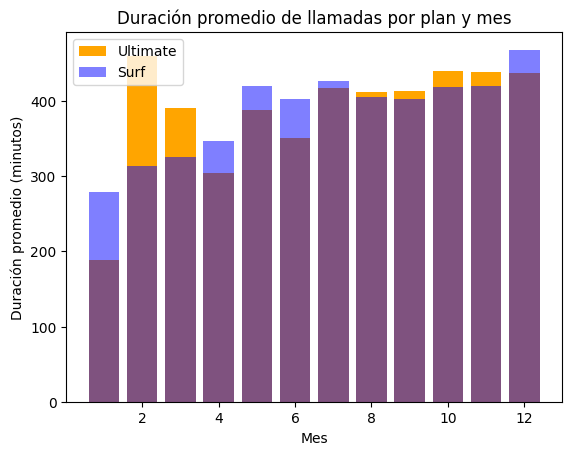

In [36]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

# Agrupo y convierto en un dataframe nuevo
duration_mean= df_merge.groupby(['plan', 'month'])['duration'].mean().reset_index()
print(duration_mean)

#filtro por plan
ultimate = duration_mean[duration_mean['plan']=='ultimate']
surf = duration_mean[duration_mean['plan']=='surf']

#Imprimo gráfico de barras superpuesto por plan
plt.bar(ultimate['month'], ultimate['duration'], label= 'Ultimate', color= 'orange' )
plt.bar(surf['month'], surf['duration'], label= 'surf', color= 'blue', alpha= 0.5)


plt.title('Duración promedio de llamadas por plan y mes'),
plt.ylabel('Duración promedio (minutos)'),
plt.xlabel('Mes')
plt.legend(['Ultimate','Surf'])
plt.show()

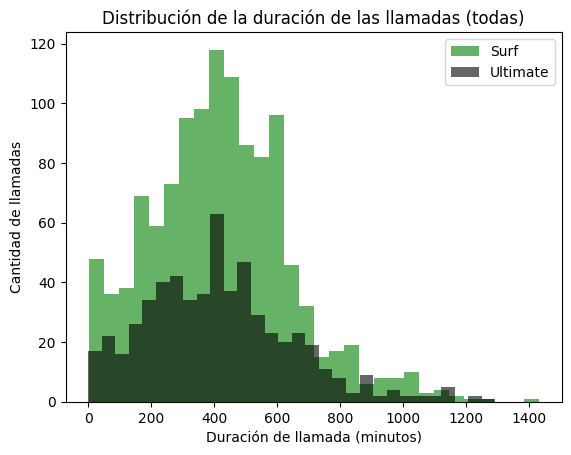

La cantidad de llamadas máxima registrada en el plan SURF es: 1432
La cantidad de llamadas máxima registrada en el plan ULTIMATE es: 1293


In [37]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

# Histogramas por plan
plt.hist(df_merge[df_merge['plan'] == 'surf']['duration'], 
         bins=30, alpha=0.6, label='Surf', color='green')

plt.hist(df_merge[df_merge['plan'] == 'ultimate']['duration'], 
         bins=30, alpha= 0.6, label='Ultimate', color='black')

plt.title('Distribución de la duración de las llamadas (todas)'),
plt.xlabel('Duración de llamada (minutos)')
plt.ylabel('Cantidad de llamadas')
plt.legend(['Surf', 'Ultimate'])
plt.show()


print('La cantidad de llamadas máxima registrada en el plan SURF es:', df_merge[df_merge['plan'] == 'surf']['duration'].max())
print('La cantidad de llamadas máxima registrada en el plan ULTIMATE es:', df_merge[df_merge['plan'] == 'ultimate']['duration'].max())

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [38]:
# Calcula la media y la varianza de la duración mensual de llamadas.

print('la media de la duración mensual de llamadas es:', df_merge['duration'].mean())
varianza = df_merge['duration'].var()
print('la varianza de la duración mensual de llamadas es:', varianza)

la media de la duración mensual de llamadas es: 420.2222853894258
la varianza de la duración mensual de llamadas es: 51478.971607743304


<AxesSubplot:xlabel='duration'>

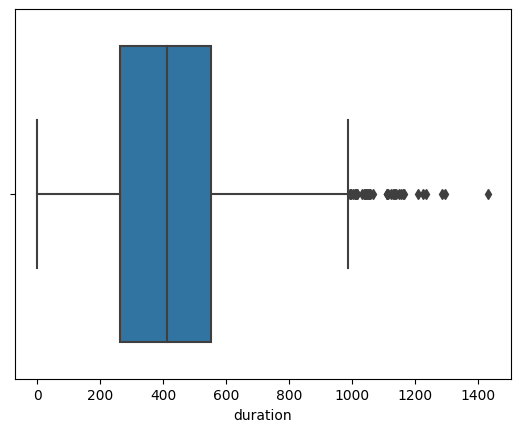

In [39]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

sns.boxplot(df_merge['duration'])

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

Los gráficos obtenidos muestran el comportamiento de los usuarios de Megaline en la categoría de las llamadas, en estos gráficos se evaluaron sus dos tarifas de prepago Surf y Ultimate. 
En primer lugar, al graficar la media mensual de la duración de las llamadas en ambos planes prepago, se puede ver que el comportamiento en general de las dos categorías es muy similar a lo largo de los 12 meses del año, teniendo meses en los cuales el promedio de la duración de las llamadas en Surf supera el promedio de la duración de las llamadas en Ultimate (Enero, Abril, Mayo, Junio y Diciembre) y en los meses restantes es justo al contrario (Febrero, Marzo, Julio, Agosto, Septiembre, Octubre y Noviembre). En ambos casos llegando a una duración promedio de 400 minutos.

Por otro lado, al comparar los histogramas que presentan la distribución de la cantidad de las llamadas contra la duración de las llamadas (minutos), vemos que en ambos casos los planes presentan una concentración de llamadas en los rangos de menor duración por lo cual, los datos se agrupan a la izquierda del gráfico.
El pico más alto del histograma del plan Ultimate ocurre en el rango de aproximadamente 0 a 60 minutos, donde se registraron cerca de 400 llamadas. Por otro lado, el plan Surf muestra su mayor frecuencia en el rango cercano a 60 a 120 minutos, también con un volumen de llamadas que ronda las 400.
Esto sugiere que, aunque la mayoría de los usuarios de ambos planes realizan llamadas de corta a media duración, los usuarios del plan Surf tienden a tener llamadas ligeramente más largas en comparación con los del plan Ultimate.


En el Diagrama de Caja y Bigotes se observa que la duración mínima de las llamadas es de 0 minutos. El primer cuartil se sitúa en torno a los 250 minutos, mientras que la mediana supera levemente los 400 minutos. El tercer cuartil alcanza aproximadamente los 550 minutos, y el valor máximo sin considerar atípicos llega a unos 1000 minutos. Además, se identifican valores atípicos que superan este umbral, con algunos casos aislados que alcanzan hasta los 1400 minutos.


### Mensajes

        plan  month  total_messages
0       surf      1       21.000000
1       surf      2       21.600000
2       surf      3       21.937500
3       surf      4       24.685714
4       surf      5       33.547170
5       surf      6       32.742857
6       surf      7       34.786517
7       surf      8       37.302521
8       surf      9       38.585034
9       surf     10       41.475138
10      surf     11       40.087156
11      surf     12       47.686992
12  ultimate      1       20.666667
13  ultimate      2       27.800000
14  ultimate      3       34.714286
15  ultimate      4       28.937500
16  ultimate      5       44.333333
17  ultimate      6       37.135135
18  ultimate      7       41.212766
19  ultimate      8       47.929825
20  ultimate      9       45.901408
21  ultimate     10       47.488636
22  ultimate     11       47.656863
23  ultimate     12       53.744000


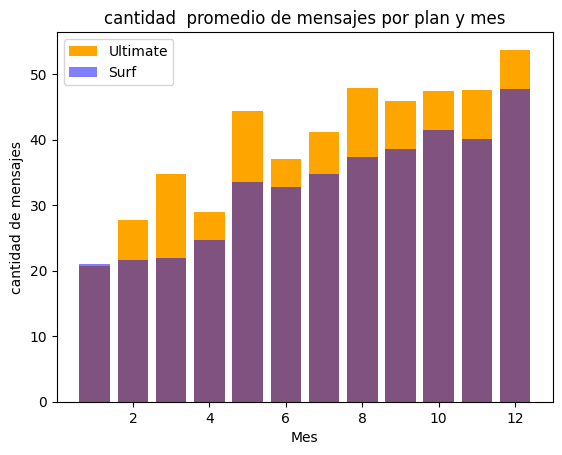

In [40]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

# Agrupo y convierto en un dataframe nuevo
msg_por_mes= df_merge.groupby(['plan', 'month'])['total_messages'].mean().reset_index()
print(msg_por_mes)

#filtro por plan
ultimate = msg_por_mes[msg_por_mes['plan']=='ultimate']
surf = msg_por_mes[msg_por_mes['plan']=='surf']

#Imprimo gráfico de barras superpuesto por plan
plt.bar(ultimate['month'], ultimate['total_messages'], label= 'Ultimate', color= 'orange' )
plt.bar(surf['month'], surf['total_messages'], label= 'surf', color= 'blue', alpha= 0.5)


plt.title('cantidad  promedio de mensajes por plan y mes'),
plt.ylabel('cantidad de mensajes'),
plt.xlabel('Mes')
plt.legend(['Ultimate','Surf'])
plt.show()

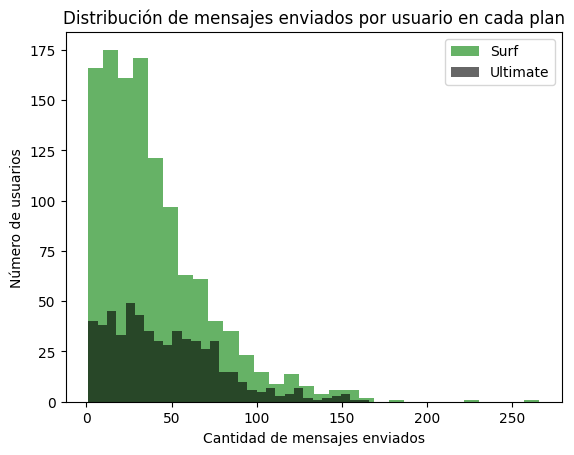

La cantidad máxima de mensajes enviados en el plan SURF es: 266
La cantidad máxima de mensajes enviados en el plan ULTIMATE es: 166


In [41]:
# He escogido mostrar la distribución de la cantidad de mensajes enviados por los usuarios de cada plan.

# Histogramas por plan
plt.hist(df_merge[df_merge['plan'] == 'surf']['total_messages'], 
         bins=30, alpha=0.6, label='Surf', color='green')

plt.hist(df_merge[df_merge['plan'] == 'ultimate']['total_messages'], 
         bins=30, alpha= 0.6, label='Ultimate', color='black')

plt.title('Distribución de mensajes enviados por usuario en cada plan'),
plt.xlabel('Cantidad de mensajes enviados')
plt.ylabel('Número de usuarios')
plt.legend(['Surf', 'Ultimate'])
plt.show()


print('La cantidad máxima de mensajes enviados en el plan SURF es:', df_merge[df_merge['plan'] == 'surf']['total_messages'].max())
print('La cantidad máxima de mensajes enviados en el plan ULTIMATE es:', df_merge[df_merge['plan'] == 'ultimate']['total_messages'].max())


la media del total mensual de mensajes enviados es: 41.78283115406481
la varianza del total de mensajes enviados es: 1067.5546311153885


<AxesSubplot:xlabel='total_messages'>

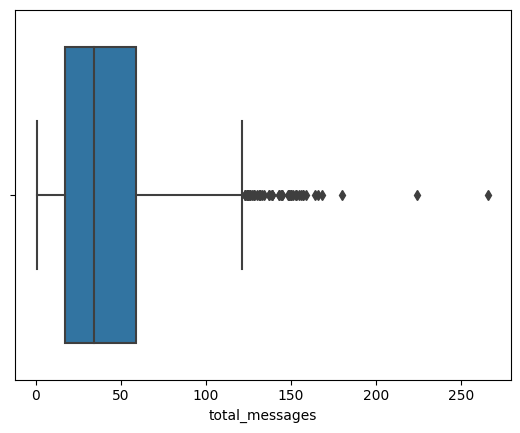

In [42]:
#Calcular la media y la varianza del número de mensajes enviados por mes, por plan

msg_mean= df_merge['total_messages'].mean()
print('la media del total mensual de mensajes enviados es:', msg_mean)

varianza_msg = df_merge['total_messages'].var()
print('la varianza del total de mensajes enviados es:', varianza_msg)

#Traza un diagrama de caja para comparar la distribución de mensajes enviados por mes según el plan 
sns.boxplot(df_merge['total_messages'])

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

Al revisar el gráfico de cantidad de mensajes promedio por plan y mes es válido afirmar que en general durante el año los usuarios Ultimate envían mayor cantidad de mensajes que los usuarios surf teniendo que, al menos durante siete meses del año los usuarios del plan Ultimate llegan a enviar entre 40 y 55 mensajes al mes en promedio, y para el caso de los usuarios del plan Surf durante al menos 8 meses del año los usuarios llegan a enviar en promedio entre 30 y 50 mensajes al mes.

Luego, al observar la distribución de mensajes enviados por usuario se hace evidente que para el plan surf hay una constante que es que siempre hay una mayor cantidad de usuarios que envían más mensajes que los usuarios en el Plan Ultimate
Este gráfico muestra que la gran mayoría de los datos están agrupados hacia la izquierda es decir que la cantidad de mensajes enviados en los dos planes suele mantenerse entre los 50 y 100 mensajes enviados por la mayoría de clientes

Sin embargo en el rango de cero a cincuenta mensajes enviados el número de los clientes del plan surf es bastante alto y muy por encima de los usuarios del otro plan ya que alcanza valores entre los 150 y los 175 usuarios que envían de 0 a 50 mensajes durante todo el año. Y en el caso del plan Ultimate en este mismo rango de cantidad de mensajes enviados (0 a 50), se obtiene la mayor Cantidad de usuarios que envían mensajes pero este grupo no supera los 50 usuarios.

Finalmente revisando el diagrama de caja y bigotes, los datos de varianza y la media, encontramos que los datos se agrupan principalmente entre los veinte y los sesenta mensajes enviados luego hay datos atípicos que superan los ciento veinte mensajes enviados llegando incluso hasta 266 pero la media de los datos indica que se envían mensualmente alrededor de 41.78 mensajes cada mes.


### Internet

        plan  month  total_mb_per_user
0       surf      1        7894.790000
1       surf      2        9310.764000
2       surf      3       12397.342500
3       surf      4       11851.091429
4       surf      5       14851.419623
5       surf      6       15565.743286
6       surf      7       16708.588315
7       surf      8       17161.736891
8       surf      9       16492.743197
9       surf     10       17406.222376
10      surf     11       16300.159358
11      surf     12       17968.352602
12  ultimate      1        6953.200000
13  ultimate      2       17335.756000
14  ultimate      3       23835.722857
15  ultimate      4       14285.791875
16  ultimate      5       16993.530000
17  ultimate      6       15451.022162
18  ultimate      7       16499.324255
19  ultimate      8       17976.983333
20  ultimate      9       16410.551549
21  ultimate     10       17512.219205
22  ultimate     11       17323.745686
23  ultimate     12       18267.285840


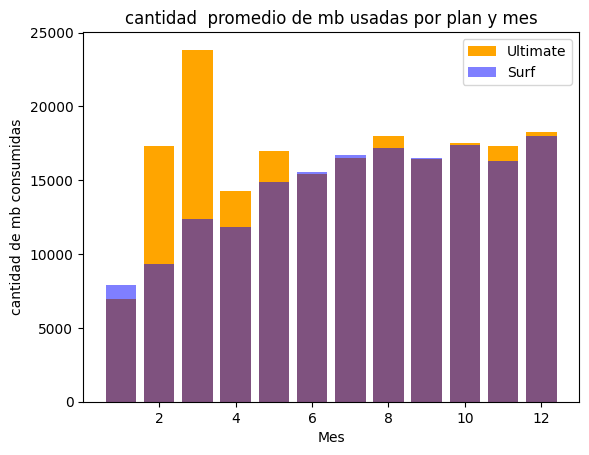

In [43]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

# Agrupo y convierto en un dataframe nuevo
mb_por_mes= df_merge.groupby(['plan', 'month'])['total_mb_per_user'].mean().reset_index()
print(mb_por_mes)

#filtro por plan
ultimate = mb_por_mes[msg_por_mes['plan']=='ultimate']
surf = mb_por_mes[msg_por_mes['plan']=='surf']

#Imprimo gráfico de barras superpuesto por plan
plt.bar(ultimate['month'], ultimate['total_mb_per_user'], label= 'Ultimate', color= 'orange' )
plt.bar(surf['month'], surf['total_mb_per_user'], label= 'surf', color= 'blue', alpha= 0.5)


plt.title('cantidad  promedio de mb usadas por plan y mes'),
plt.ylabel('cantidad de mb consumidas'),
plt.xlabel('Mes')
plt.legend(['Ultimate','Surf'])
plt.show()

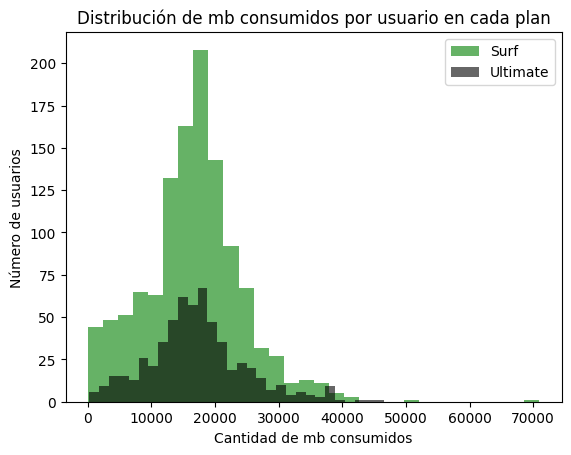

La cantidad máxima de mb consumidos en el plan SURF es: 70931.59
La cantidad máxima de mb consumidos en el plan ULTIMATE es: 46595.32999999999


In [44]:
#Trazar un histograma que muestre la distribución del uso de Internet por plan

# Histogramas por plan
plt.hist(df_merge[df_merge['plan'] == 'surf']['total_mb_per_user'], 
         bins=30, alpha=0.6, label='Surf', color='green')

plt.hist(df_merge[df_merge['plan'] == 'ultimate']['total_mb_per_user'], 
         bins=30, alpha= 0.6, label='Ultimate', color='black')

plt.title('Distribución de mb consumidos por usuario en cada plan'),
plt.xlabel('Cantidad de mb consumidos')
plt.ylabel('Número de usuarios')
plt.legend(['Surf', 'Ultimate'])
plt.show()


print('La cantidad máxima de mb consumidos en el plan SURF es:', df_merge[df_merge['plan'] == 'surf']['total_mb_per_user'].max())
print('La cantidad máxima de mb consumidos en el plan ULTIMATE es:', df_merge[df_merge['plan'] == 'ultimate']['total_mb_per_user'].max())


la media del total mensual de mensajes enviados es: 16833.751097214325
la varianza del total de mensajes enviados es: 59423784.30934834


<AxesSubplot:xlabel='total_mb_per_user'>

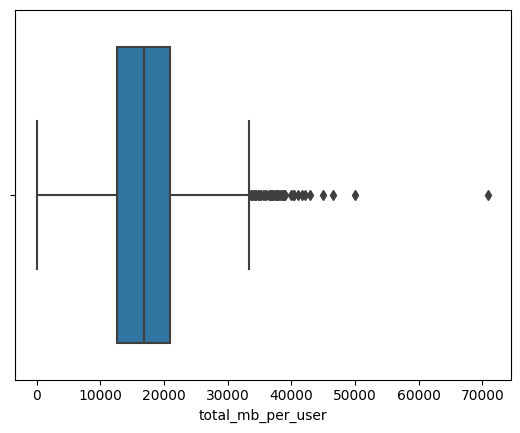

In [45]:
#Calcular la media y la varianza del número de mb consumidas por mes, por plan

total_mb_mean= df_merge['total_mb_per_user'].mean()
print('la media del total mensual de mensajes enviados es:', total_mb_mean)

varianza_mb = df_merge['total_mb_per_user'].var()
print('la varianza del total de mensajes enviados es:', varianza_mb)

#Traza un diagrama de caja para comparar la distribución de mb consumidas por mes según el plan 
sns.boxplot(df_merge['total_mb_per_user'])

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

Según lo observado en el gráfico de barras que muestra la cantidad promedio de megabytes consumidos por plan cada mes del año, es válido decir que los dos planes presentan un consumo similar durante al menos siete meses del año que serían de junio en adelante. Adicionalmente, el plan ultimate suele estar por encima en lo que respecta a la cantidad de megas consumidas por los usuarios diferenciándose bastante sobre todo en el mes de febrero y marzo ya que en estos meses casi duplica el consumo del los usuarios en el plan Surf, llegando a valores de 17,335.756 y 23,835.722 mb consumidas respectivamente por los usuarios Ultimate.

Luego, revisando la distribución de megabytes consumidos por usuario en cada plan es posible ver un comportamiento similar a lo visto en los gráficos anteriores el plan surf posee mayor cantidad de clientes que el plan ultimate pero su distribución es muy similar ya que ambos presentan una distribución normal 
Esta distribución normal muestra que la media para ambos planes es muy cercana y se encuentra alrededor de los 16.800 megas a 20.000 megas consumidas por los usuarios
Y para el caso de el plan surf hay alrededor de doscientas personas que consumen esa cantidad de megas a lo largo del año mientras que en el caso del plan Ultimate el número de clientes ronda los 60 usuarios consumiendo esa misma cantidad de megas en el año

Por otro lado, revisando el diagrama de caja y bigotes se puede decir que tiene un valor mínimo en 0 y un valor máximo que ronda los 35.000 MB y su media se encuentra exactamente en 16.833.75 megabytes consumidas por todos los usuarios.


## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

        plan  month  ingreso_mensual
0       surf      1        20.000000
1       surf      2        23.668000
2       surf      3        38.326875
3       surf      4        40.267429
4       surf      5        50.370943
5       surf      6        51.754429
6       surf      7        61.358427
7       surf      8        64.019832
8       surf      9        56.858299
9       surf     10        64.982983
10      surf     11        56.721376
11      surf     12        68.289512
12  ultimate      1        70.000000
13  ultimate      2        70.000000
14  ultimate      3        78.000000
15  ultimate      4        73.062500
16  ultimate      5        71.000000
17  ultimate      6        72.081081
18  ultimate      7        72.382979
19  ultimate      8        72.456140
20  ultimate      9        71.380282
21  ultimate     10        72.147727
22  ultimate     11        72.127451
23  ultimate     12        72.744000


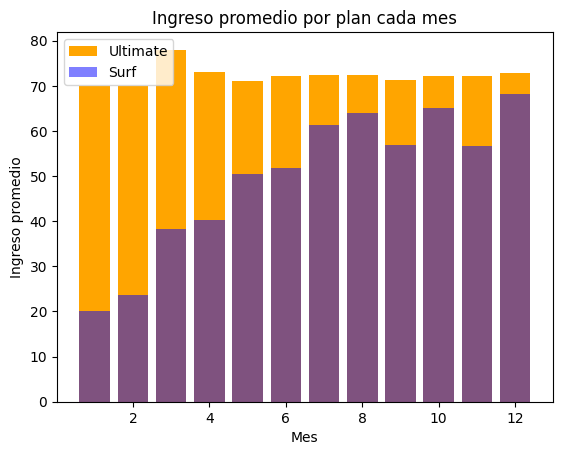

In [46]:
# Compara los ingresos promedio por mes y por plan

# Agrupo y convierto en un dataframe nuevo
income_per_month= df_merge.groupby(['plan', 'month'])['ingreso_mensual'].mean().reset_index()
print(income_per_month)

#filtro por plan
ultimate = income_per_month[income_per_month['plan']=='ultimate']
surf = income_per_month[income_per_month['plan']=='surf']

#Imprimo gráfico de barras superpuesto por plan
plt.bar(ultimate['month'], ultimate['ingreso_mensual'], label= 'Ultimate', color= 'orange' )
plt.bar(surf['month'], surf['ingreso_mensual'], label= 'surf', color= 'blue', alpha= 0.5)

plt.title('Ingreso promedio por plan cada mes'),
plt.ylabel('Ingreso promedio'),
plt.xlabel('Mes')
plt.legend(['Ultimate','Surf'])
plt.show()

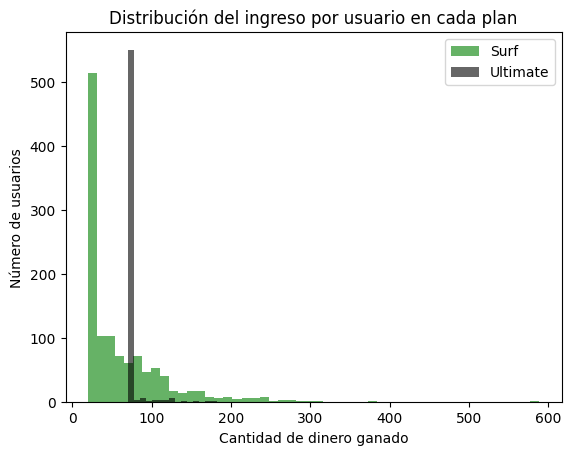

Cantidad máxima de dinero pagado por un usuario en el plan SURF es: 588.66
Cantidad máxima de dinero pagado por un usuario en el plan ULTIMATE es: 182.0


In [47]:
#Traza un gráfico de barras que compare los ingresos mensuales totales por plan
# Histogramas por plan
plt.hist(df_merge[df_merge['plan'] == 'surf']['ingreso_mensual'], 
         bins=50, alpha=0.6, label='Surf', color='green')

plt.hist(df_merge[df_merge['plan'] == 'ultimate']['ingreso_mensual'], 
         bins=15, alpha= 0.6, label='Ultimate', color='black')

plt.title('Distribución del ingreso por usuario en cada plan'),
plt.xlabel('Cantidad de dinero ganado')
plt.ylabel('Número de usuarios')
plt.legend(['Surf', 'Ultimate'])
plt.show()


print('Cantidad máxima de dinero pagado por un usuario en el plan SURF es:', df_merge[df_merge['plan'] == 'surf']['ingreso_mensual'].max())
print('Cantidad máxima de dinero pagado por un usuario en el plan ULTIMATE es:', df_merge[df_merge['plan'] == 'ultimate']['ingreso_mensual'].max())


la media del total mensual de mensajes enviados es: 64.04163160886867
la varianza del total de mensajes enviados es: 1988.4371746400923


<AxesSubplot:xlabel='ingreso_mensual'>

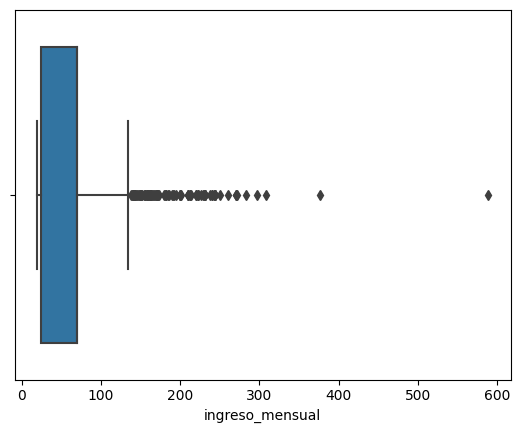

In [48]:
#Calcular la media y la varianza del ingreso generado por mes, por plan

total_income_mean= df_merge['ingreso_mensual'].mean()
print('la media del total mensual de mensajes enviados es:', total_income_mean)

varianza_income = df_merge['ingreso_mensual'].var()
print('la varianza del total de mensajes enviados es:', varianza_income)

#Traza un diagrama de caja para comparar la distribución de mb consumidas por mes según el plan 
sns.boxplot(df_merge['ingreso_mensual'])

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

En primer lugar el gráfico de barras que presenta el ingreso promedio por plan cada mes muestra que a lo largo del año el ingreso generado por los usuarios ultimate se mantiene bastante constante con un valor de 70 dolares cada mes ya que sólo tiene pequeñas variaciones en marzo y abril subiendo un poco por encima de las otras barras, mientras que para el caso de los usuarios surf es evidente que hay un incremento a lo largo del año ya que comienza en 20 dólares y continúa aumentando hasta detener su incremento en los últimos seis meses del año manteniéndose en valores entre 50 y 65 dólares.

Adicionalmente en el gráfico de distribución del ingreso por cada plan podemos ver que la gran mayoría de los usuarios del plan surf (más de 500) generan un ingreso de entre 20 y 100 dólares a lo largo del año mientras que el plan Ultimate muestra que la gran mayoría de sus usuarios (más de 500) generan un ingreso entre los 70 y los 200 dólares durante todo el año

Y por último el diagrama de caja y bigotes del ingreso el general muestra que se tiene un valor mínimo en los veinte dólares y un valor máximo entre los 140 dólares pero el consumo se da principalmente según la media en $62.45 dólares, luego el diagrama de caja y bigotes muestra como tambien hay datos atípicos, teniendo valores que están por encima de los 140 dólares,  llegando incluso hasta 594 dólares como valor máximo pagado por un usuario.

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

 Muy buena prática la de usar distintos tipos de gráficas identificar algunos hallazgos y llegar a conclusiones
</div>

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [49]:
#Hipótesis Nula (Ho): El ingreso promedio de los usuarios del plan Ultimate es igual al del plan Surf
#Hipótesis Alternativa (H1): El ingreso promedio de los usuarios del plan Ultimate es diferente al del plan Surf
#alpha = 0.05

# Prueba las hipótesis

#tomo el dataframe mezclado (df_merge), lo filtro por planes y según sus respectivos ingresos.
ingresos_plan_ultimate = df_merge[df_merge['plan']== 'ultimate']['ingreso_mensual']
ingresos_plan_surf = df_merge[df_merge['plan']== 'surf']['ingreso_mensual']

#realizo la prueba t Student para muestras independientes.
results= ttest_ind(ingresos_plan_ultimate, ingresos_plan_surf, equal_var= False)

print("Valor p:", results.pvalue)

#resultado e interpretación

if results.pvalue < 0.05:
    print("Se rechaza la hipótesis nula: hay una diferencia significativa en los ingresos")
else:
    print("No se puede rechazar la hipótesis nula: no hay diferencia significativa")

Valor p: 8.319558977074422e-14
Se rechaza la hipótesis nula: hay una diferencia significativa en los ingresos


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [50]:
#Hipótesis Nula (Ho): El ingreso promedio de los usuarios del area de NY-NJ es igual al de los usuarios de otras regiones
#Hipótesis Alternativa (H1): El ingreso promedio de los usuarios del area de NY-NJ es diferente al de los usuarios de otras regiones
#alpha = 0.05

# Prueba las hipótesis

#1ero agregaré la columna 'state' del dataframe df_users basado en la columna 'user_id'
df_full = df_merge.merge(df_users[['user_id', 'state']], on = 'user_id')

#filtro y almaceno nuevamente los usuarios que provengan de NY o NJ, y los que no son de ahí.
ny_nj_users = df_full[df_full['state'].isin(['NY MSA', 'NJ MSA'])]
other_users = df_full[~df_full['state'].isin(['NY MSA', 'NJ MSA'])]

# Obtengo los ingresos mensuales
ingresos_ny_nj = ny_nj_users['ingreso_mensual']
ingresos_otros = other_users['ingreso_mensual']

#realizo la prueba t Student para muestras independientes.

results = ttest_ind(ingresos_ny_nj, ingresos_otros, equal_var=False)
print("Valor p:", results.pvalue)

if results.pvalue < 0.05:
    print("Se rechaza la hipótesis nula: hay una diferencia significativa en ingresos.")
else:
    print("No se puede rechazar la hipótesis nula: no hay diferencia significativa.")

Valor p: 0.09627688861742448
No se puede rechazar la hipótesis nula: no hay diferencia significativa.


<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Excelente trabajo con el desarrollo de las pruebas de hipótesis. Solamente en futuras ocasiones te recomiendo considerar realizar la prueba de levene para mostrar el supuesto de varianzas iguales. 

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

Gracias por la recomendación, lo tendré en cuenta para futuros proyectos. 

## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

Luego de realizar el análisis de datos de los clientes de Megaline, y de observar detalladamente sus hábitos de consumo en llamadas, mensajes, internet y el ingreso generado por cada uno, es posible obtener varias conclusiones importantes que ayudan a entender mejor el comportamiento de los usuarios y las diferencias entre los planes prepago Surf y Ultimate.

En primer lugar, **las llamadas** presentan comportamientos similares entre planes, aunque en ciertos meses del año uno puede superar al otro. Sin embargo, ambos tienen un promedio general cercano a los 400 minutos por mes, y la mayoría de los usuarios se concentran en llamadas cortas. Esto indica que el servicio de llamadas se utiliza con moderación por parte de la mayoría de los clientes, con algunos pocos usuarios que realizan llamadas mucho más largas, generando valores atípicos en los datos.

En cuanto a los **mensajes**, los usuarios del plan Ultimate suelen enviar una mayor cantidad promedio de mensajes mes a mes, pero el plan Surf concentra más usuarios en los rangos bajos (0 a 50 mensajes). Es decir, aunque en promedio Ultimate genera más mensajes, la mayoría de los usuarios en Surf siguen siendo más activos en cantidad. Este comportamiento refuerza la idea de que hay más usuarios en Surf, pero con un uso menos intensivo de mensajes.

Por otro lado, respecto al **uso de internet**, ambos planes presentan un consumo bastante similar en promedio, especialmente desde mitad de año en adelante. Sin embargo, el plan Ultimate muestra picos elevados en los primeros meses (febrero y marzo), lo que podría deberse a usuarios más intensivos o situaciones particulares en ese periodo. En general, la distribución de megabytes consumidos sigue una forma normal, lo cual indica una consistencia en el comportamiento de la mayoría de los usuarios, con algunos pocos casos atípicos que elevan el máximo hasta 35.000 MB.

En el caso de los **ingresos**, el plan Ultimate presenta un ingreso mensual más constante y predecible, manteniéndose en los 70, mientras que el plan Surf muestra una tendencia creciente a lo largo del año, lo cual puede indicar que los usuarios van utilizando más servicios extra con el tiempo o superando los límites incluidos en su tarifa básica. Además, se observa que aunque muchos usuarios generan ingresos bajos, también hay casos que superan ampliamente los \$140, llegando incluso a los \$594, lo que habla de usuarios con un consumo muy por encima del promedio.

Finalmente, al aplicar las **pruebas de hipótesis**, los resultados confirman parte de lo observado en los gráficos:

1. En la primera hipótesis se concluyó que **existe una diferencia significativa en los ingresos generados por los usuarios de los dos planes** (valor p extremadamente bajo), lo cual valida la idea de que el tipo de plan afecta directamente el ingreso promedio mensual.
2. En la segunda hipótesis, que comparaba los ingresos de los usuarios en la región NY-NJ contra el resto, **no se encontró una diferencia estadísticamente significativa** (valor p mayor al nivel alfa), lo que indica que la región de residencia no influye de manera clara en el ingreso mensual que genera un usuario.

En resumen, se puede decir que **el tipo de plan influye de forma clara en el comportamiento de los usuarios y en los ingresos de la empresa**, mientras que la ubicación geográfica no parece ser un factor determinante en este caso. A partir de este análisis, Megaline puede tomar decisiones más informadas para optimizar sus estrategias de marketing, tarifas y servicios ofrecidos a cada segmento de sus clientes.

y respondiendo a la pregunta **¿Qué plan es mejor?** o **¿Cúal es la mejor tarifa?**

**Ultimate es la mejor tarifa para la empresa**, porque ofrece mayor ingreso promedio, estabilidad financiera, menor complejidad en el cálculo de cargos y un comportamiento de uso más predecible.
en cualquier caso, el plan Surf tambien tiene un papel importante porque su precio puede atraer a una mayor cantidad de clientes podría mantenerse como un plan de entrada o básico, con potencial de upselling hacia Ultimate para usuarios que tengan un consumo más alto de forma constante.

